In [1]:
from sympy import *
from IPython.display import display, Math
import numpy as np
init_printing(use_unicode=True)


In [2]:
from sympy import solve
x, y, sigma, mu, delta, alpha, beta, ro, eta, b, lambd = symbols(
    'x y σ μ δ α β ρ η b λ')
sigma_c = 0.1181
ro_c = 1.31
eta_c = 20.19
alpha_c = 1.636
beta_c = 0.002
delta_c = 0.3743
mu_c = 0.005
b_c = 0

dxdt = sigma + ro*x*y/(eta + y) - mu*x*y - delta*x
dydt = alpha*y*(1-beta*y)-x*y-(b*y)/(1+y)

concrete_params = {ro: ro_c, sigma: sigma_c, eta: eta_c, b: b_c,
                   alpha: alpha_c, beta: beta_c, mu: mu_c, delta: delta_c}
muless_params = dict(concrete_params)
del muless_params[mu]


In [3]:
display(Math('\dfrac{dx}{dt} = ' + latex(dxdt)))
display(Math('\dfrac{dy}{dt} = ' + latex(dydt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Точки равновесия

### 1

In [4]:
display(Math('x = ' + latex(sigma/delta)))
display(Math('y = 0' )) # Решение не зависит от μ

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Остаьные равновесия аналитически не найти. Полином 5 степени.

In [6]:
def get_solutions(cur_mu=concrete_params[mu]):
    params = dict(concrete_params)
    params[mu] = cur_mu
    return solve([dxdt.subs(params), dydt.subs(params)], x,y)

In [7]:
def display_solutions(sols):
    for s in sols:
        display(s)

In [8]:
solutions = get_solutions()

In [9]:
for s in solutions:
    display(s)

### Матрица первого приближения

#### Частные производные

In [10]:
dfdx = diff(dxdt, x)
dfdy = diff(dxdt, y)
dgdx = diff(dydt, x)
dgdy = diff(dydt, y)


In [11]:
display(Math('\dfrac{df}{dx} = ' + latex(dfdx)))
display(Math('\dfrac{df}{dy} = ' + latex(dfdy)))
display(Math('\dfrac{dg}{dx} = ' + latex(dgdx)))
display(Math('\dfrac{dg}{dy} = ' + latex(dfdy)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Частные производные в точке равновесия

In [12]:
a11 = dfdx.evalf(subs={**eqilibrium, **muless_params})
a12 = dfdy.evalf(subs={**eqilibrium, **muless_params})
a21 = dgdx.evalf(subs={**eqilibrium, **muless_params})
a22 = dgdy.evalf(subs={**eqilibrium, **muless_params})


NameError: name 'eqilibrium' is not defined

In [13]:
jacob_matrix = Matrix([[a11, a12], [a21, a22]])
jacob_matrix


NameError: name 'a11' is not defined

In [ ]:
j = jacob_matrix - np.eye(2) * lambd
j


In [ ]:
j.det()


In [ ]:
lam1, lam2 = solve(j.det(), lambd)
lam1, lam2

##### λ ∈ R разных знаков. Седло

#### Бифуркационная диаграмма

In [14]:
mus = np.linspace(0.002, 0.022, 101)
mus

array([0.002 , 0.0022, 0.0024, 0.0026, 0.0028, 0.003 , 0.0032, 0.0034,
       0.0036, 0.0038, 0.004 , 0.0042, 0.0044, 0.0046, 0.0048, 0.005 ,
       0.0052, 0.0054, 0.0056, 0.0058, 0.006 , 0.0062, 0.0064, 0.0066,
       0.0068, 0.007 , 0.0072, 0.0074, 0.0076, 0.0078, 0.008 , 0.0082,
       0.0084, 0.0086, 0.0088, 0.009 , 0.0092, 0.0094, 0.0096, 0.0098,
       0.01  , 0.0102, 0.0104, 0.0106, 0.0108, 0.011 , 0.0112, 0.0114,
       0.0116, 0.0118, 0.012 , 0.0122, 0.0124, 0.0126, 0.0128, 0.013 ,
       0.0132, 0.0134, 0.0136, 0.0138, 0.014 , 0.0142, 0.0144, 0.0146,
       0.0148, 0.015 , 0.0152, 0.0154, 0.0156, 0.0158, 0.016 , 0.0162,
       0.0164, 0.0166, 0.0168, 0.017 , 0.0172, 0.0174, 0.0176, 0.0178,
       0.018 , 0.0182, 0.0184, 0.0186, 0.0188, 0.019 , 0.0192, 0.0194,
       0.0196, 0.0198, 0.02  , 0.0202, 0.0204, 0.0206, 0.0208, 0.021 ,
       0.0212, 0.0214, 0.0216, 0.0218, 0.022 ])

In [15]:
from tqdm import tqdm

In [16]:
xs=[]
ys = []
mul = []
solutions_by_mu={}
for cur_mu in tqdm(mus):
    solutions = get_solutions(cur_mu)
    solutions_by_mu[cur_mu]= solutions
    for s in solutions:
        if s[1]!=0:# and s[1].as_real_imag()[1]==0:#real
            ys.append(s[1].as_real_imag()[0])
            mul.append(cur_mu)
            
    

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [06:06<00:00,  3.63s/it]


In [28]:
ims = []
imus=[]
for cur_mu, sols in list(solutions_by_mu.items()):
    for s in sols:
        if s[1]!=0:# and s[1].as_real_imag()[1]==0:#real
            ims.append(s[1].as_real_imag()[1])
            imus.append(cur_mu)
ims=list(map(float, ims))

In [ ]:
ims

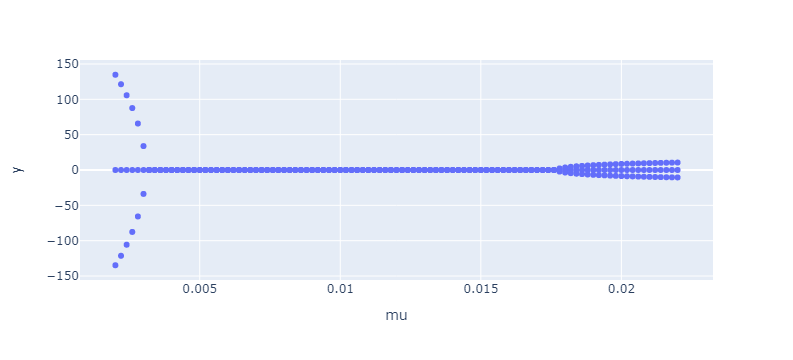

In [30]:
fig = px.scatter(x=imus, y=ims).update_layout(xaxis={"title": "mu"}, legend={"title":"im"})#, color='species', size='petal_length')
fig.show()

In [35]:
for cur_mu, sols in list(solutions_by_mu.items()):
    print(f"mu = {cur_mu}")
    display_solutions(sols)
    display("*"*20)

mu = 0.002


'********************'

mu = 0.0022


'********************'

mu = 0.0024000000000000002


'********************'

mu = 0.0026


'********************'

mu = 0.0028


'********************'

mu = 0.003


'********************'

mu = 0.0031999999999999997


'********************'

mu = 0.0034


'********************'

mu = 0.0036


'********************'

mu = 0.0038


'********************'

mu = 0.004


'********************'

mu = 0.0042


'********************'

mu = 0.004399999999999999


'********************'

mu = 0.0046


'********************'

mu = 0.0048


'********************'

mu = 0.004999999999999999


'********************'

mu = 0.0052


'********************'

mu = 0.0054


'********************'

mu = 0.0056


'********************'

mu = 0.0058


'********************'

mu = 0.006


'********************'

mu = 0.0062


'********************'

mu = 0.0063999999999999994


'********************'

mu = 0.0066


'********************'

mu = 0.0068


'********************'

mu = 0.006999999999999999


'********************'

mu = 0.0072


'********************'

mu = 0.0073999999999999995


'********************'

mu = 0.007599999999999999


'********************'

mu = 0.0078


'********************'

mu = 0.008


'********************'

mu = 0.008199999999999999


'********************'

mu = 0.0084


'********************'

mu = 0.0086


'********************'

mu = 0.008799999999999999


'********************'

mu = 0.009


'********************'

mu = 0.0092


'********************'

mu = 0.009399999999999999


'********************'

mu = 0.0096


'********************'

mu = 0.0098


'********************'

mu = 0.01


'********************'

mu = 0.010199999999999999


'********************'

mu = 0.0104


'********************'

mu = 0.0106


'********************'

mu = 0.010799999999999999


'********************'

mu = 0.011


'********************'

mu = 0.0112


'********************'

mu = 0.011399999999999999


'********************'

mu = 0.0116


'********************'

mu = 0.0118


'********************'

mu = 0.011999999999999999


'********************'

mu = 0.012199999999999999


'********************'

mu = 0.0124


'********************'

mu = 0.012599999999999998


'********************'

mu = 0.012799999999999999


'********************'

mu = 0.013


'********************'

mu = 0.013199999999999998


'********************'

mu = 0.013399999999999999


'********************'

mu = 0.0136


'********************'

mu = 0.0138


'********************'

mu = 0.013999999999999999


'********************'

mu = 0.014199999999999999


'********************'

mu = 0.0144


'********************'

mu = 0.014599999999999998


'********************'

mu = 0.014799999999999999


'********************'

mu = 0.015


'********************'

mu = 0.015199999999999998


'********************'

mu = 0.015399999999999999


'********************'

mu = 0.0156


'********************'

mu = 0.015799999999999998


'********************'

mu = 0.016


'********************'

mu = 0.0162


'********************'

mu = 0.016399999999999998


'********************'

mu = 0.016599999999999997


'********************'

mu = 0.0168


'********************'

mu = 0.017


'********************'

mu = 0.0172


'********************'

mu = 0.0174


'********************'

mu = 0.017599999999999998


'********************'

mu = 0.017799999999999996


'********************'

mu = 0.018000000000000002


'********************'

mu = 0.0182


'********************'

mu = 0.0184


'********************'

mu = 0.0186


'********************'

mu = 0.018799999999999997


'********************'

mu = 0.018999999999999996


'********************'

mu = 0.019200000000000002


'********************'

mu = 0.0194


'********************'

mu = 0.0196


'********************'

mu = 0.019799999999999998


'********************'

mu = 0.019999999999999997


'********************'

mu = 0.020199999999999996


'********************'

mu = 0.0204


'********************'

mu = 0.0206


'********************'

mu = 0.0208


'********************'

mu = 0.020999999999999998


'********************'

mu = 0.021199999999999997


'********************'

mu = 0.021399999999999995


'********************'

mu = 0.0216


'********************'

mu = 0.0218


'********************'

mu = 0.022


'********************'

In [32]:
ys=list(map(float, ys))

In [33]:
import plotly.express as px

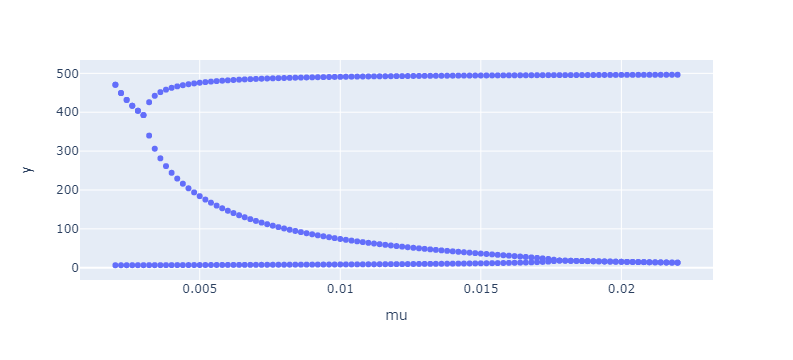

In [34]:
fig = px.scatter(x=mul, y=ys).update_layout(xaxis={"title": "mu"}, legend={"title":""})#, color='species', size='petal_length')
fig.show()